In [1]:
import os, tqdm, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import sys
sys.path.append('../')

from ptype.soundings import utils

# investigating sleet soundings by confidence level

In [2]:
model = 'ML'
#model = "true label"

In [3]:
def plot_mean_med_density(ax, subdf, quantiles=[0, 0.1, 0.3, 0.5]):
    mean = subdf.mean()
    num_obs = subdf.shape[0]
    ax.plot(mean, mean.index, color = 'tab:orange')

    for q in quantiles:
        ax.fill_betweenx(np.array(subdf.columns, dtype=int), 
                         subdf.quantile(q), 
                         subdf.quantile(1-q), 
                         alpha=0.2, color='b')

    ax.legend(title=(
                     f"density for sleet\nNum Obs: {num_obs}\n"
                     f"Frac of Total Sleet ({model}): {num_obs/NUM_SLEET:.2f}\n"
                     f"Frac of total highconf wrong {num_obs/TOTAL_HCONF_WRONG:.2f}"
                    ))

# load and select data

In [4]:
df = pd.read_hdf('/glade/scratch/dkimpara/ptype_data/sleet_processed.h5', 'sleetdf')  
temp_cols = [col_name for col_name in list(df.columns) if isinstance(col_name, int)]

model = "ML"
NUM_SLEET = df[df.pred_label == 2].shape[0]

conf = 0.7
sleetdf = df[(df.pred_conf >= conf) & (df.true_label != 2)].copy()
TOTAL_HCONF_WRONG = sleetdf.shape[0]

# zero crossings


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


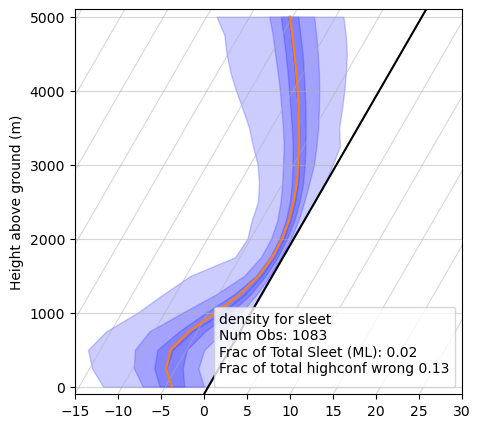

In [5]:
subdf = sleetdf[(sleetdf.num_crossings_zero == 0)]

fig, axs = utils.skewCompositeFigAx(figsize=(5, 5), num_subplots=1)
ax = axs[0]
plot_mean_med_density(ax, subdf[temp_cols])

# one crossing

## crossing is below 1000m

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


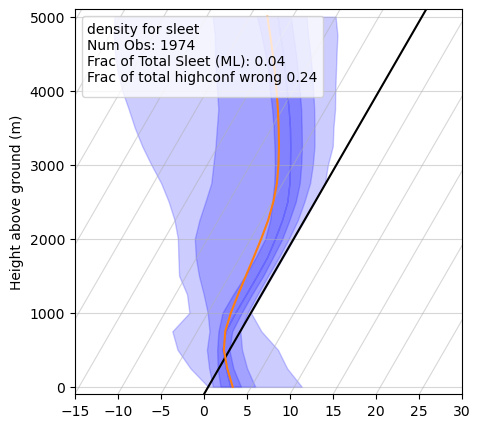

In [6]:
subdf = sleetdf[(sleetdf.num_crossings_zero == 1) & (sleetdf.cross_below_1000 == 1)]

fig, axs = utils.skewCompositeFigAx(figsize=(5, 5), num_subplots=1)
ax = axs[0]
plot_mean_med_density(ax, subdf[temp_cols])

## crossing is below 3000m

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


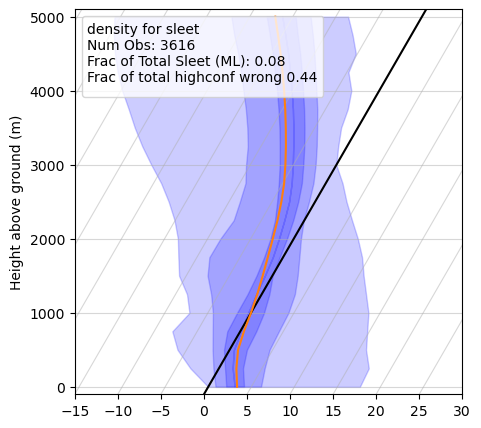

In [7]:
subdf = sleetdf[(sleetdf.num_crossings_zero == 1) & (sleetdf.cross_below_3000 == 1)]

fig, axs = utils.skewCompositeFigAx(figsize=(5, 5), num_subplots=1)
ax = axs[0]
plot_mean_med_density(ax, subdf[temp_cols])

## crossing is above 1000m

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


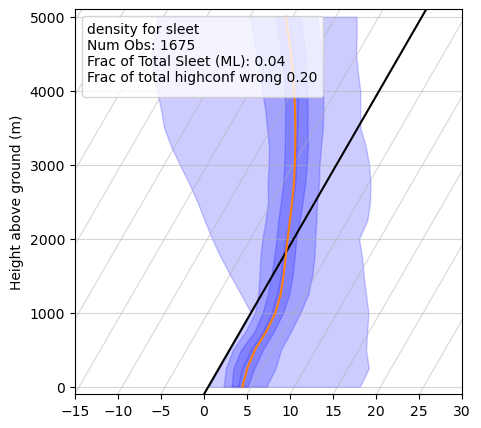

In [8]:
subdf = sleetdf[(sleetdf.num_crossings_zero == 1) & (sleetdf.cross_below_1000 == 0)]

fig, axs = utils.skewCompositeFigAx(figsize=(5, 5), num_subplots=1)
ax = axs[0]
plot_mean_med_density(ax, subdf[temp_cols])

## two crossings or more

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


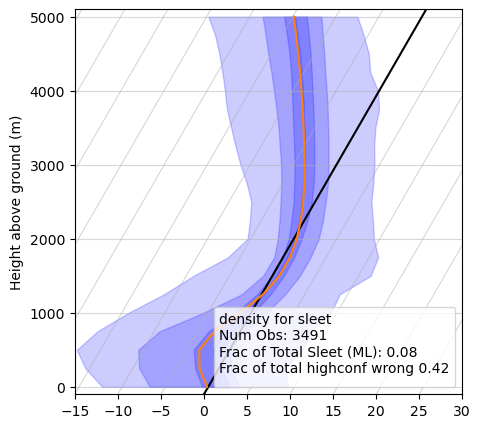

In [9]:
subdf = sleetdf[(sleetdf.num_crossings_zero >= 2)]

fig, axs = utils.skewCompositeFigAx(figsize=(5, 5), num_subplots=1)
ax = axs[0]
plot_mean_med_density(ax, subdf[temp_cols])